 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import csv
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path(r"whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_df.sort_values(by='Date', ascending=True, inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path = Path(r"algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_df.sort_values(by='Date', ascending=True, inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().mean()*100

Algo 1    0.0
Algo 2    0.0
dtype: float64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_path = Path(r"sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_df.sort_values(by='Date', ascending=True, inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_df['Close'].dtype

dtype('O')

In [10]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df['Close'].dtype

<ipython-input-10-4ca96341af32>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')


dtype('float64')

In [11]:
# Calculate Daily Returns
sp500_daily_df = sp500_df.pct_change()
sp500_daily_df['Close'] = sp500_daily_df['Close'].astype('float')
sp500_daily_df['Close'].dtype
sp500_daily_df.head(20)

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
2012-10-09,-0.009891
2012-10-10,-0.006188
2012-10-11,0.000195


In [12]:
# Drop nulls
sp500_daily_df.dropna(inplace=True)
sp500_daily_df.isnull().sum()

Close    0
dtype: int64

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_df.rename(columns={"Close":"S&P 500"}, inplace=True)
sp500_daily_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_df = pd.concat([whale_df,algo_df,sp500_daily_df], axis='columns', join='inner')
portfolio_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

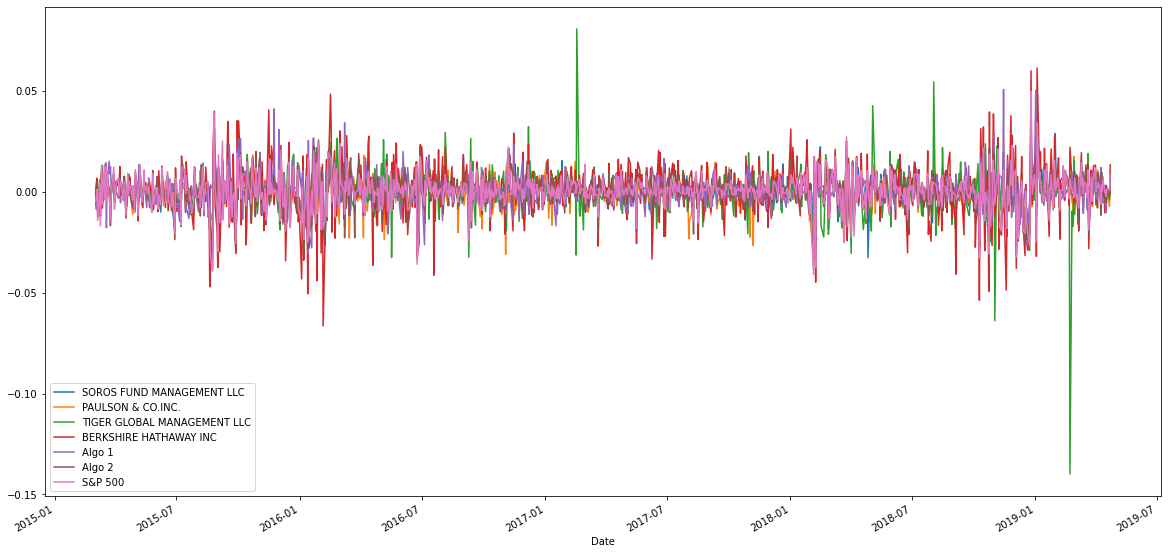

In [15]:
# Plot daily returns of all portfolios
portfolio_plot = portfolio_df.plot(figsize=(20,10))



#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

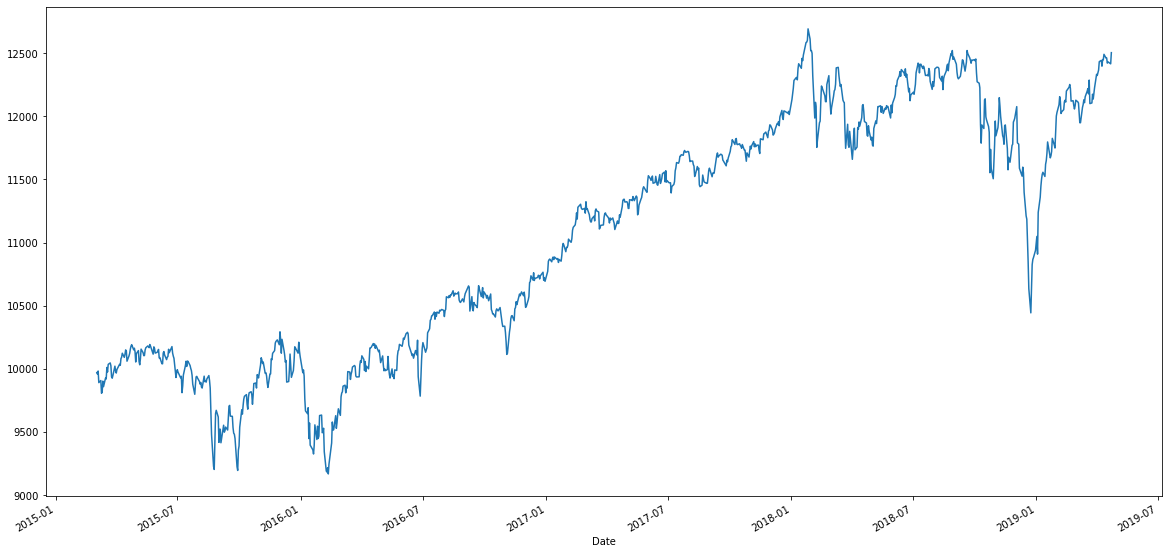

In [16]:
# Calculate cumulative returns of all portfolios
weights = [0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.30]
portfolio_returns = portfolio_df.dot(weights)
portfolio_returns.head()
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.head()

# Plot cumulative returns
initial_investment = 10000
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

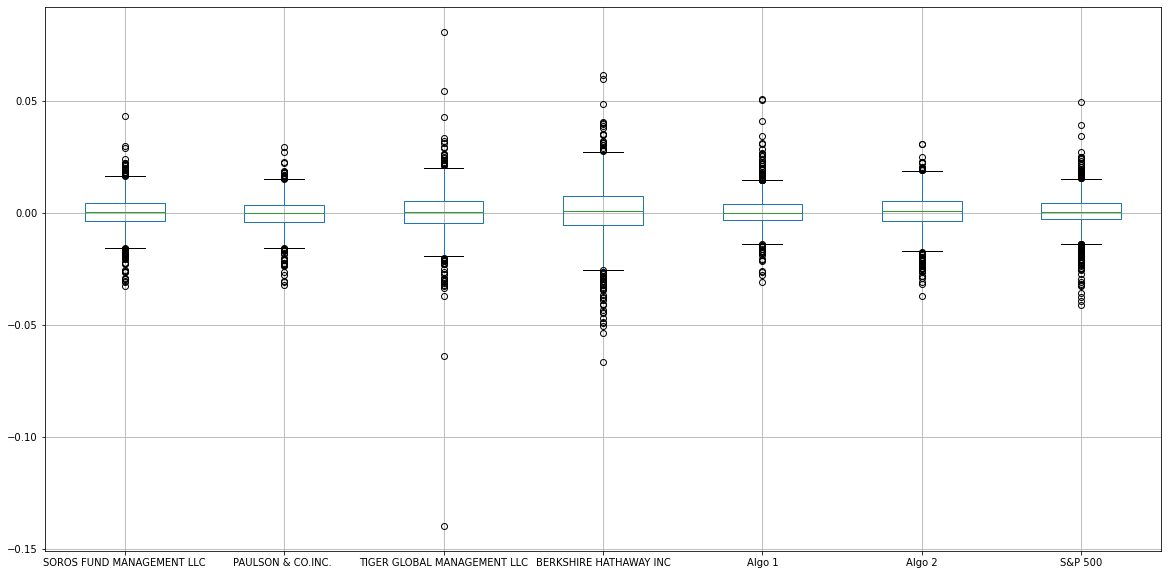

In [17]:
# Box plot to visually show risk

portfolio_df.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios

portfolio_std = portfolio_df.std()
portfolio_std.head()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500

sp500_std = sp500_daily_df.std()
sp500_std

# Determine which portfolios are riskier than the S&P 500

#name = portfolio_std.loc[0]

#def risk_assess():
 #   for x in portfolio_std:
 #       #if x > sp500_std:
 #       print(f'{name} is riskier than the S&P 500.')
 #       #else:
 #       return
#risk_assess()


sp500_std = portfolio_std["S&P 500"].std()
portfolio_std.std() > sp500_std

True

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = portfolio_df.std() * np.sqrt(252)
annualized_std.sort_values(inplace=True)
annualized_std

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation'}, xlabel='Date'>

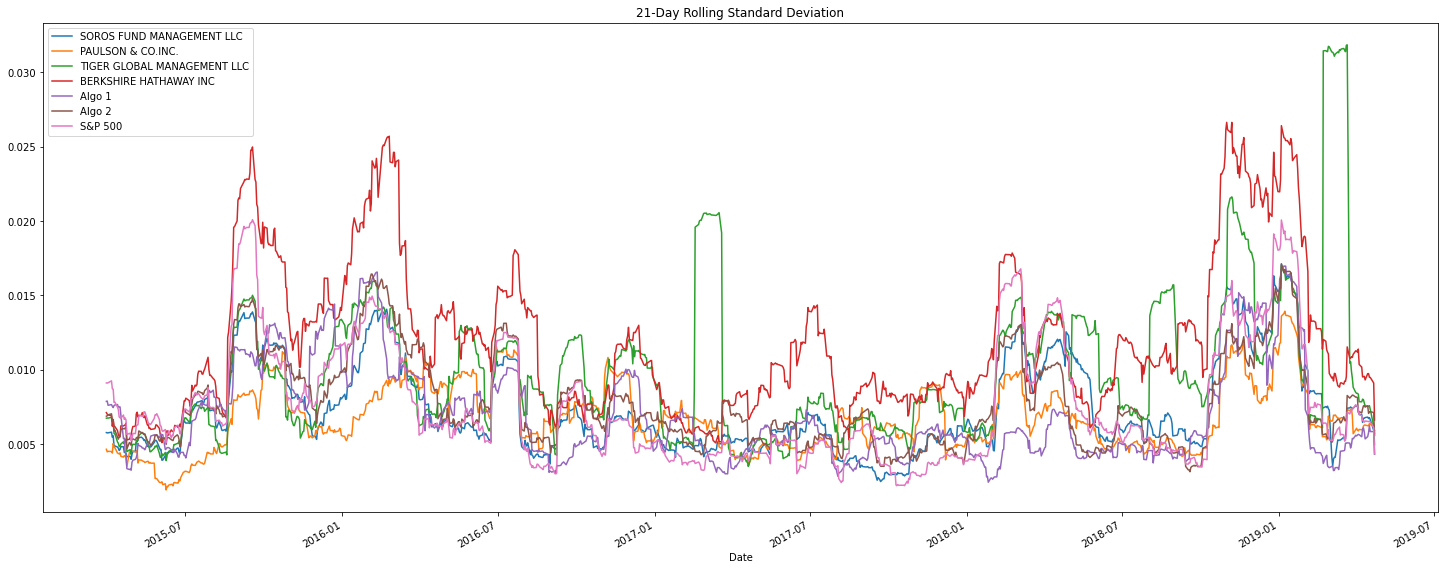

In [86]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

portfolio_21day_std = portfolio_df.rolling(window=21).std()
#portfolio_21day_std.head(23)     ## to check the data output

# Plot the rolling standard deviation
#portfolio_df.rolling(window=21).std().plot(figsize=(25,10), title="21-Day Rolling Standard Deviation")
portfolio_21day_std.plot(figsize=(25,10), title="21-Day Rolling Standard Deviation")

### Calculate and plot the correlation

In [22]:
# Calculate the correlation
correlation = portfolio_df.corr()

# Display the correlation matrix
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

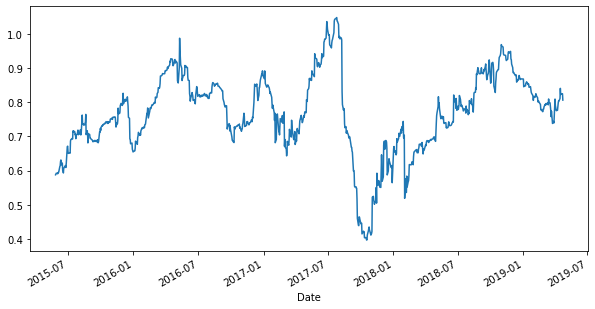

In [75]:
# Calculate covariance of a single portfolio

#soros_fund = portfolio_df.loc[:,"SOROS FUND MANAGEMENT LLC"]
#soros_fund

soros_covariance = (portfolio_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(portfolio_df['S&P 500']))
soros_covariance

# Calculate variance of S&P 500

sp500_variance = portfolio_df['S&P 500'].rolling(window=60).var()
sp500_variance

# Computing beta

soros_beta = soros_covariance / sp500_variance
soros_beta

# Plot beta trend
soros_beta.plot(figsize=(10,5))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

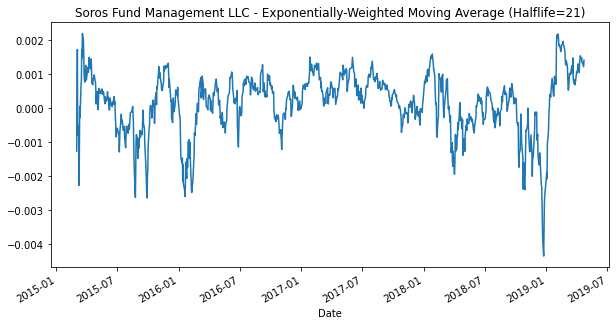

In [76]:
# Use `ewm` to calculate the rolling window

soros_df = portfolio_df.iloc[:, 0]
# soros_df - to check the data

soros_ewm = soros_df.ewm(halflife=21).mean()
soros_ewm_plot = soros_ewm.plot(figsize=(10,5), title="Soros Fund Management LLC - Exponentially-Weighted Moving Average (Halflife=21)")

#portfolio_ewm = portfolio_df.ewm(halflife=21).mean()
#portfolio_ewm_plot = portfolio_ewm.plot(figsize=(20,10), title='Exponentially-Weighted Moving Average') ## This one I did first, but I think we just need to do a single portfolio like above.

---

# Sharpe Ratios
In reality, investment managers and their institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios

sharpe_ratio = (portfolio_df.mean() * 252) / annualized_std # (portfolio_df.std() * np.sqrt(252))
sharpe_ratio.head(8)


Algo 1                         1.378648
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
PAULSON & CO.INC.             -0.483570
S&P 500                        0.648267
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

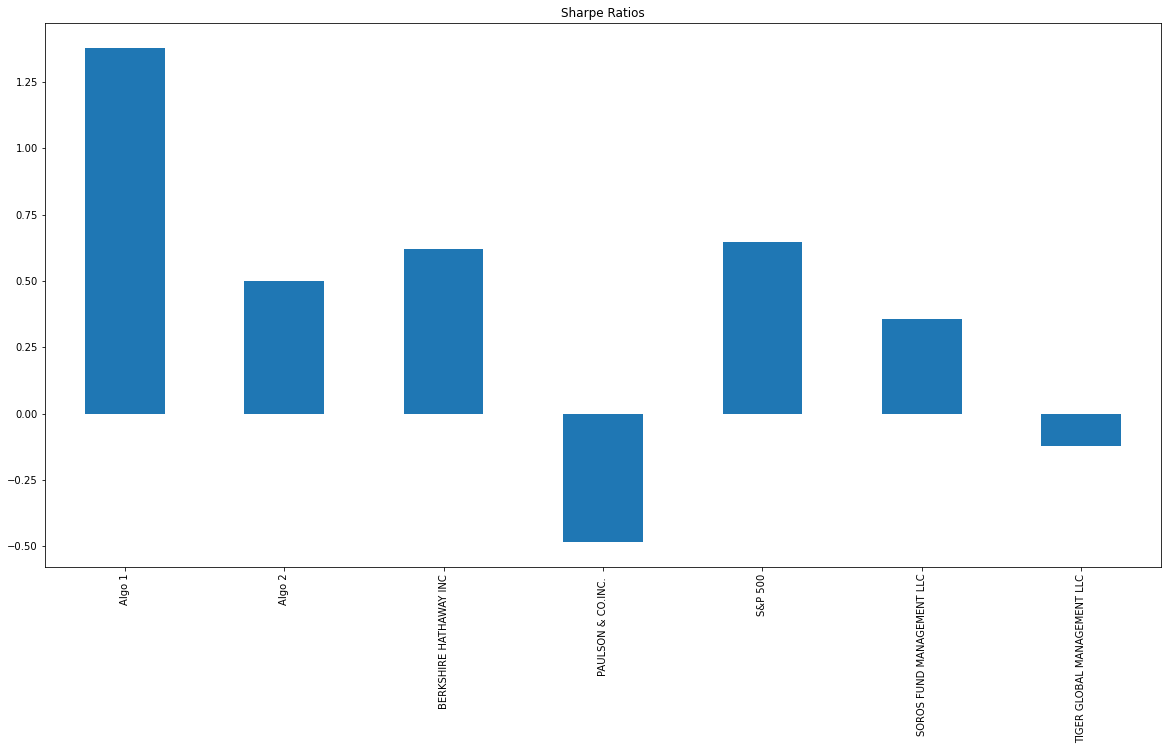

In [26]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratio.plot.bar(figsize=(20,10), title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 outperformed everyone. Although Algo 2 underperformed the S&P 500, it outperformed all the whale portfolios with the exception of Berkshire Hathaway.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listed in the S&P 500 index.

* `MCD` - [McDonald's Corporation](https://en.wikipedia.org/wiki/McDonalds)

* `XOM` - [ExxonMobil Corp.](https://en.wikipedia.org/wiki/ExxonMobil)

* `PM` - [Philip Morris International Inc.](https://en.wikipedia.org/wiki/Philip_Morris_International)

In [55]:
# Reading data from 1st stock

mcd_path = Path("mcd_pathfile.csv")
mcd_df = pd.read_csv(mcd_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
mcd_df.rename(columns={'Close': 'MCD'}, inplace=True)
mcd_df.sort_index(ascending=True, inplace=True)
mcd_df

,MCD
Date,
2015-03-03,99.74
2015-03-04,100.25
2015-03-05,99.11
2015-03-06,97.13
2015-03-09,97.71
...,...
2019-04-15,191.85
2019-04-16,191.70
2019-04-17,191.61


In [56]:
# Reading data from 2nd stock

xom_path = Path("xom_pathfile.csv")
xom_df = pd.read_csv(xom_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
xom_df.rename(columns={'Close': 'XOM'}, inplace=True)
xom_df.sort_index(ascending=True, inplace=True)
xom_df

,XOM
Date,
2015-03-03,87.62
2015-03-04,87.18
2015-03-05,86.74
2015-03-06,85.63
2015-03-09,85.16
...,...
2019-04-15,80.65
2019-04-16,81.20
2019-04-17,81.43


In [57]:
# Reading data from 3rd stock

pm_path = Path("pm_pathfile.csv")
pm_df = pd.read_csv(pm_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
pm_df.rename(columns={'Close': 'PM'}, inplace=True)
pm_df.sort_index(ascending=True, inplace=True)
pm_df

,PM
Date,
2015-03-03,82.70
2015-03-04,82.17
2015-03-05,81.71
2015-03-06,80.05
2015-03-09,80.45
...,...
2019-04-15,86.19
2019-04-16,86.21
2019-04-17,85.48


In [58]:
# Combine all stocks in a single DataFrame

my_portfolio_df = pd.concat([mcd_df, xom_df, pm_df], axis="columns", join="inner")
my_portfolio_df

,MCD,XOM,PM
Date,,,
2015-03-03,99.74,87.62,82.70
2015-03-04,100.25,87.18,82.17
2015-03-05,99.11,86.74,81.71
2015-03-06,97.13,85.63,80.05
2015-03-09,97.71,85.16,80.45
...,...,...,...
2019-04-15,191.85,80.65,86.19
2019-04-16,191.70,81.20,86.21
2019-04-17,191.61,81.43,85.48


In [59]:
# Reset Date index

In [ ]:
# Reorganize portfolio data by having a column per symbol


In [69]:
# Calculate daily returns

my_portfolio_daily = my_portfolio_df.pct_change()

# Drop NAs

my_portfolio_daily.isnull().sum()
my_portfolio_daily.dropna(inplace=True)

# Display sample data
my_portfolio_daily


,MCD,XOM,PM
Date,,,
2015-03-04,0.005113,-0.005022,-0.006409
2015-03-05,-0.011372,-0.005047,-0.005598
2015-03-06,-0.019978,-0.012797,-0.020316
2015-03-09,0.005971,-0.005489,0.004997
2015-03-10,-0.014533,-0.010568,-0.014916
...,...,...,...
2019-04-15,0.001305,-0.003337,0.004897
2019-04-16,-0.000782,0.006820,0.000232
2019-04-17,-0.000469,0.002833,-0.008468


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [73]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns = my_portfolio_daily.dot(weights)
my_portfolio_returns.head()
my_cumulative_returns = (1 + my_portfolio_returns).cumprod()

# Display sample data
my_cumulative_returns.head()

Date
2015-03-04    0.997894
2015-03-05    0.990571
2015-03-06    0.973041
2015-03-09    0.974818
2015-03-10    0.961815
dtype: float64

<AxesSubplot:xlabel='Date'>

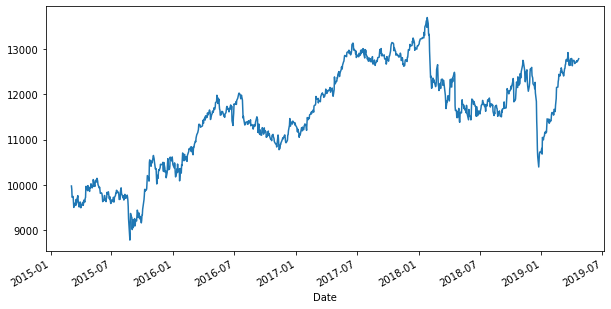

In [74]:
# Plot cumulative returns
my_initial_investment = 10000
my_cumulative_profit = my_initial_investment * my_cumulative_returns
my_cumulative_profit.plot(figsize=(10,5))

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [81]:
# Join your returns DataFrame to the original returns DataFrame

aggregate_df = pd.concat([my_portfolio_daily, portfolio_df], axis='columns', join='inner')
aggregate_df.head()


,MCD,XOM,PM,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,,,
2015-03-04,0.005113,-0.005022,-0.006409,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,-0.011372,-0.005047,-0.005598,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.019978,-0.012797,-0.020316,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.005971,-0.005489,0.004997,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.014533,-0.010568,-0.014916,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961


In [82]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
aggregate_df.dropna()

,MCD,XOM,PM,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,,,
2015-03-04,0.005113,-0.005022,-0.006409,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,-0.011372,-0.005047,-0.005598,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.019978,-0.012797,-0.020316,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.005971,-0.005489,0.004997,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.014533,-0.010568,-0.014916,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961
...,...,...,...,...,...,...,...,...,...,...
2019-04-15,0.001305,-0.003337,0.004897,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000629
2019-04-16,-0.000782,0.006820,0.000232,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.000469,0.002833,-0.008468,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [83]:
# Calculate the annualized `std`

aggregate_annualized_std = aggregate_df.std() * np.sqrt(252)
aggregate_annualized_std.sort_values(inplace=True)
aggregate_annualized_std

PAULSON & CO.INC.              0.111556
Algo 1                         0.121058
SOROS FUND MANAGEMENT LLC      0.125406
Algo 2                         0.132475
S&P 500                        0.135831
MCD                            0.169504
TIGER GLOBAL MANAGEMENT LLC    0.173072
XOM                            0.191214
BERKSHIRE HATHAWAY INC         0.205148
PM                             0.206622
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation'}, xlabel='Date'>

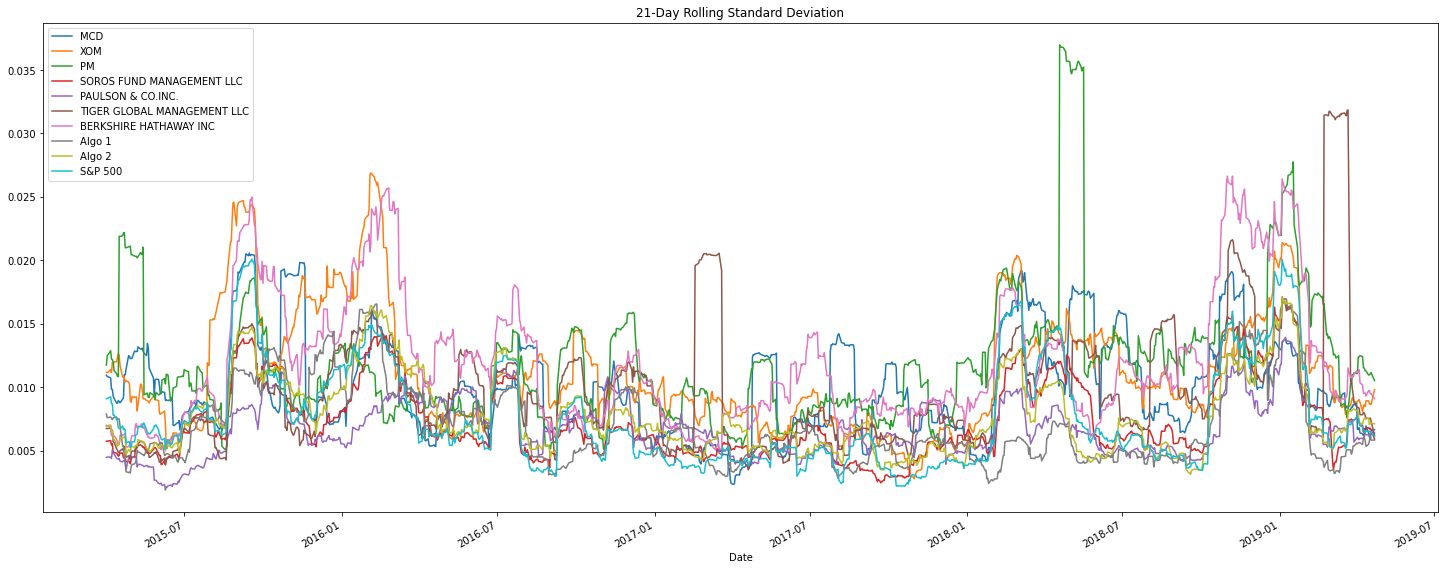

In [87]:
# Calculate rolling standard deviation

aggregate_21day_std = aggregate_df.rolling(window=21).std()
#portfolio_21day_std.head(23)     ## to check the data output

# Plot rolling standard deviation
aggregate_21day_std.plot(figsize=(25,10), title="21-Day Rolling Standard Deviation")


### Calculate and plot the correlation

<AxesSubplot:>

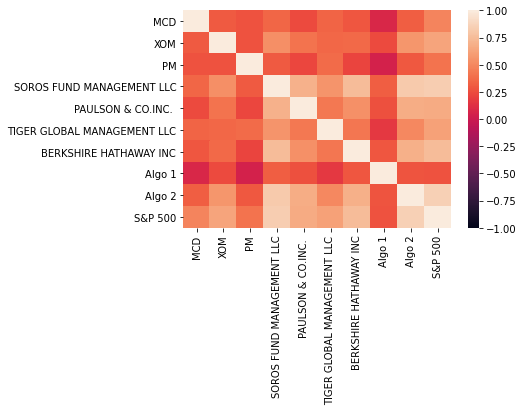

In [99]:
# Calculate and plot the correlation
aggregate_correlation = aggregate_df.corr()

# Display the correlation matrix
#aggregate_correlation ## to check data output

# Use the `heatmap` function from the seaborn library to visualize correlations
import seaborn as sns
sns.heatmap(aggregate_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Beta of 3-Stock Portfolio (MCD, XOM, PM) Compared to S&P 500'}, xlabel='Date'>

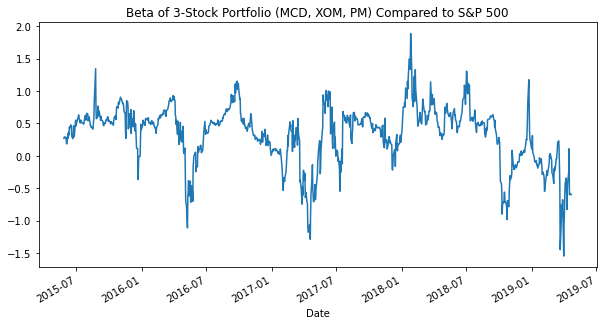

In [101]:
# Calculate and plot Beta - I am understanding the instructions to be to run the beta on my 3-stock portfolio juxtaposed with the S&P 500. 

my_portfolio_covariance = (my_cumulative_returns.rolling(window=60).cov(portfolio_df['S&P 500']))
my_portfolio_covariance

# Computing beta

my_portfolio_beta = my_portfolio_covariance / sp500_variance # sp500_variance previously calculated
my_portfolio_beta

# Plot beta trend
my_portfolio_beta.plot(figsize=(10,5), title='Beta of 3-Stock Portfolio (MCD, XOM, PM) Compared to S&P 500')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [105]:
# Calculate Annualzied Sharpe Ratios

aggregate_sharpe_ratio = (aggregate_df.mean() * 252) / aggregate_annualized_std # (portfolio_df.std() * np.sqrt(252))
aggregate_sharpe_ratio.sort_values(ascending=True)

PAULSON & CO.INC.             -0.480959
TIGER GLOBAL MANAGEMENT LLC   -0.129556
XOM                            0.025437
PM                             0.127263
SOROS FUND MANAGEMENT LLC      0.345506
Algo 2                         0.486307
BERKSHIRE HATHAWAY INC         0.614872
S&P 500                        0.641630
MCD                            1.034131
Algo 1                         1.374206
dtype: float64

<AxesSubplot:title={'center':'Aggregated Portfolio - Sharpe Ratios'}>

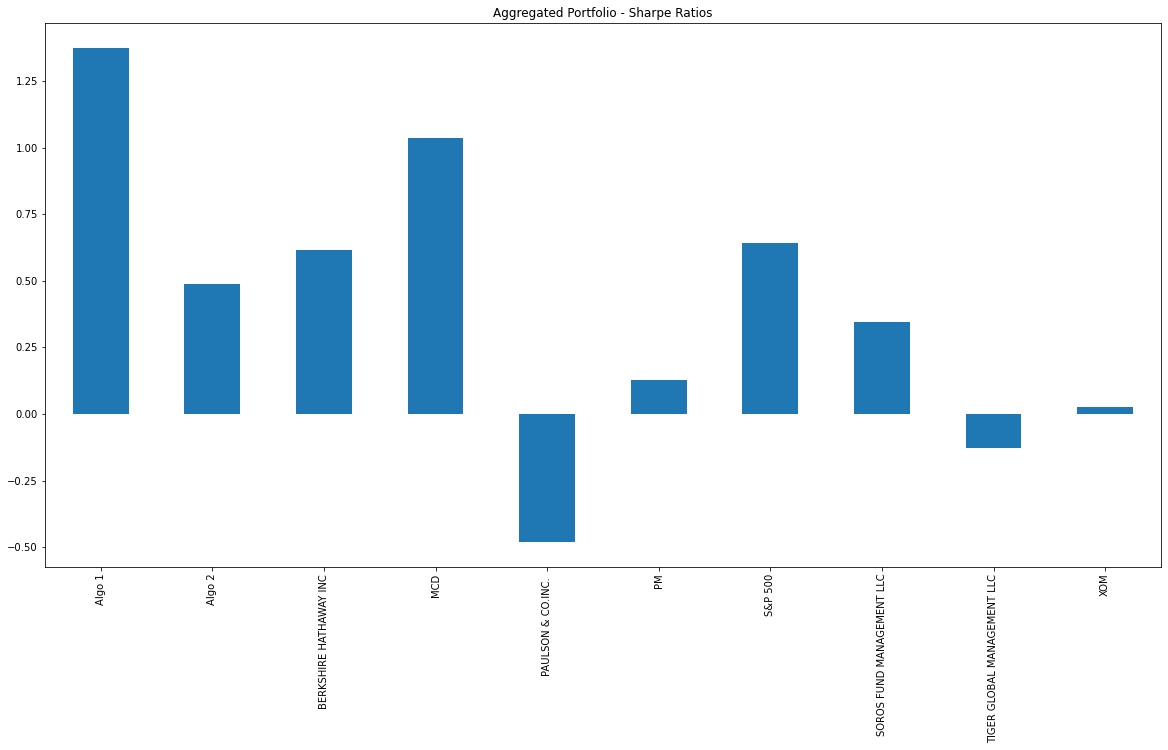

In [106]:
# Visualize the sharpe ratios as a bar plot

aggregate_sharpe_ratio.plot.bar(figsize=(20,10), title='Aggregated Portfolio - Sharpe Ratios')


### How does your portfolio do?

Write your answer here!